# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [10]:
import numpy as np
import itertools

In [11]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [12]:
class KnapSack:
    def __init__(self, profits, weights, capacity):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity

    def solve_knapsack_brute_force(self):
        length = len(self.profits)
        best = []
        max_profit = 0
        max_weight = 0
        for picks in itertools.product([False, True], repeat=length):
            # convert iterators to lists as we use them multiple times
            picks = list(picks)
            weights = list(itertools.compress(self.weights, picks))
            profits = list(itertools.compress(self.profits, picks))
            total_weight = sum(weights)
            if total_weight > self.capacity:
                continue
            total_profit = sum(profits)
            if total_profit > max_profit:
                best = list(itertools.compress(range(length), picks))
                max_profit = total_profit
                max_weight = total_weight
        return {
            "picks": best,
            "profit": max_profit,
            "weight": max_weight,
        }

    def solve_knapsack_pw_ratio(self):
        length = len(self.profits)
        ratios = list(
            zip(
                range(length),
                (profit / weight for profit, weight in zip(self.profits, self.weights)),
            )
        )
        ratios.sort(
            key=lambda t: t[1]
        )  # sort by ratio and keep indices, to know where is the item to add
        best = []
        weight = 0
        while ratios and weight != self.capacity:
            i, ratio = ratios.pop()
            if weight + self.weights[i] <= self.capacity:
                weight += self.weights[i]
                best.append(i)
        best.sort()
        return {
            "picks": best,
            "profit": sum(self.profits[i] for i in best),
            "weight": weight,
        }

In [13]:
knapsack = KnapSack(profits, weights, capacity)

In [14]:
knapsack.solve_knapsack_brute_force()

{'picks': [1, 2], 'profit': 17, 'weight': 8}

In [15]:
knapsack.solve_knapsack_pw_ratio()

{'picks': [1, 3], 'profit': 14, 'weight': 5}

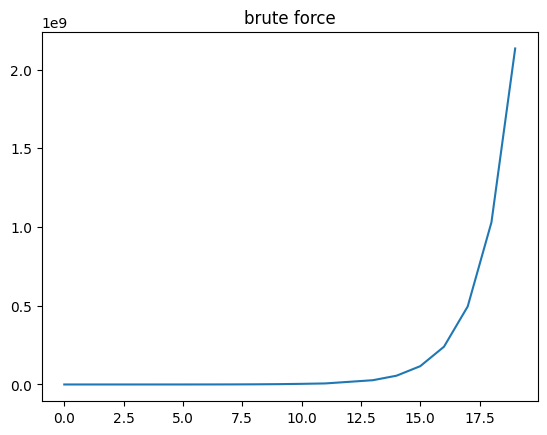

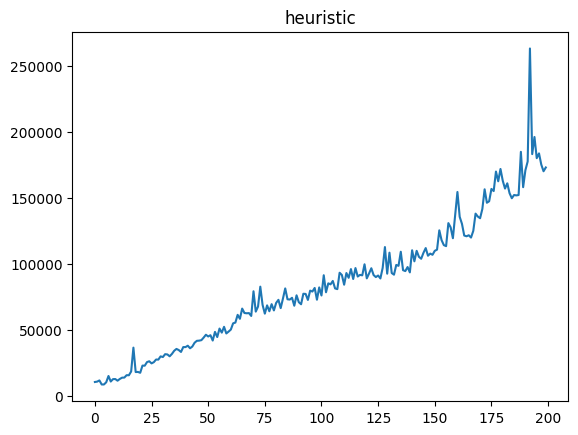

In [16]:
import time
import matplotlib.pyplot as plt


def knapsack_plot(size, method, title):
    datapoints = []
    for length in range(size):
        weights = np.random.randint(1, 11, length)
        profits = np.random.randint(1, 11, length)
        capacity = sum(weights) // 2
        knapsack = KnapSack(profits, weights, capacity)
        start = time.time_ns()
        method(knapsack)
        end = time.time_ns()
        datapoints.append(end - start)
    plt.title(title)
    plt.plot(datapoints)
    plt.show()


knapsack_plot(20, KnapSack.solve_knapsack_brute_force, "brute force")
knapsack_plot(200, KnapSack.solve_knapsack_pw_ratio, "heuristic")

In [17]:
def knapsack_correctness(size):
    weights = np.random.randint(1, 11, size)
    profits = np.random.randint(1, 11, size)
    capacity = sum(weights) // 2
    knapsack = KnapSack(profits, weights, capacity)
    bf = knapsack.solve_knapsack_brute_force()
    pw = knapsack.solve_knapsack_pw_ratio()
    if bf != pw:
        print(f"mismatch, capacity: {capacity}")
        print(f"weights: {weights}")
        print(f"profits: {profits}")
        print(f"bf: {bf}")
        print(f"pw: {pw}")
        print()


# please execute this cell until error
knapsack_correctness(3)

Wynik nie jest taki sam w sytuacji np:

```
mismatch, capacity: 4
weights: [4, 1, 4]
profits: [10, 4, 4]
bf: [0]
pw: [1]
```

Zachłannie bierzemy element 1 o wartości za wagę 2.5 i nie ma już miejsca na nic innego.
Najlepsze rozwiązanie to wzięcie 0-wego przedmiotu, który choć ma mniejszą wartość (2.5), to jednak wypełni plecak całkowicie.
Metoda heurystyczna daje dobre, ale nie zawsze najlepsze rozwiązanie. Metoda brute-force daje rozwiązanie optymalne, ale praktycznie trwa zbyt długo.